# Bag J

$X^J_U : x^j_u \sim f^j(x) = \sum_{i=1}^{K}\alpha^j \pi_i^j \Phi^+_i(x) + (1 - \alpha^j) \rho_i^j \Phi^-_i(x)$

$\sum_{i=1}^{K}\pi_i^j = 1$

$\sum_{i=1}^{K}\rho_i^j = 1$    

$X^J_L : x^j_l \sim f^j_+(x) = \sum_{i=1}^{K}\pi_i^j \Phi_i^+(x)$ 

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import daft
from daft import PGM

In [ ]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

In [ ]:
pgm = PGM()

pgm.add_node(daft.Node("bag",r"B",2,1,observed=True))
pgm.add_node(daft.Node("label",r"y",3,1))
pgm.add_node(daft.Node("cluster",r"c",3,2))
pgm.add_node(daft.Node("prior",r"a",2,4))
pgm.add_node(daft.Node("data",r"x",4,2,observed=True))
pgm.add_edge("bag","label",directed=True)
pgm.add_edge("bag","cluster")
pgm.add_edge("label","cluster")
pgm.add_edge("label","data")
pgm.add_edge("cluster","data")
pgm.add_edge("prior","label")

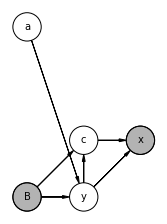

In [ ]:
pgm.render()

In [ ]:
model = convert_pgm_to_pgmpy(pgm)

$p(x) = \sum_{b \in Bags}p(b) \sum_{y_i} p(y_i|b)\sum_{i=1}^{K}p(c_i|b,y)p(x|c_i,y)$

In [ ]:
model.get_independencies()

(bag ⟂ prior)
(bag ⟂ data | label, cluster)
(bag ⟂ data | label, cluster, prior)
(cluster ⟂ prior | label, bag)
(cluster ⟂ prior | label, bag, data)
(data ⟂ prior | label, bag)
(data ⟂ bag, prior | label, cluster)
(data ⟂ prior | label, bag, cluster)
(data ⟂ bag | label, cluster, prior)
(prior ⟂ bag)
(prior ⟂ cluster, data | label, bag)
(prior ⟂ data | label, cluster)
(prior ⟂ data | label, bag, cluster)
(prior ⟂ cluster | label, bag, data)

In [ ]:
model.fit()

$p(x|b_i) = \sum_{b\in Bags}I[b_i = b][]$

In [ ]:
pgm.add_node(daft.Node("bag",r"B",2,1,observed=True))
pgm.add_node(daft.Node("label",r"y",3,1))
pgm.add_node(daft.Node("cluster",r"c",3,2))
pgm.add_node(daft.Node("data",r"x",4,2,observed=True))
pgm.add_edge("bag","label")
pgm.add_edge("bag","cluster")
pgm.add_edge("label","cluster")
pgm.add_edge("label","data")
pgm.add_edge("cluster","data")

In [ ]:
model.render()

AttributeError: 'BayesianModel' object has no attribute 'render'

$p(x) = \sum_{b_i \in {Bags}}I[b_i = b]$

In [ ]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

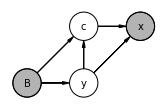

In [ ]:
pgm.render()
plt.show()

In [ ]:
model.get_independencies()

(bag ⟂ data | label, cluster)
(data ⟂ bag | label, cluster)

In [ ]:
model = BayesianModel([("bag",'label'),
                       ("bag","cluster"),
                       ("label","cluster"),
                       ("label","data"),
                       ("cluster","data")])

In [ ]:
pgm = PGM()

In [ ]:
import daft
from daft import PGM
import matplotlib.pyplot as plt

In [ ]:
import daft
from daft import PGM
import matplotlib.pyplot as plt

In [ ]:
pgm._nodes

{'bag': <daft.Node at 0x7fde47878210>,
 'pn_label': <daft.Node at 0x7fde478781d0>,
 'cluster': <daft.Node at 0x7fde47878250>,
 'data': <daft.Node at 0x7fde47878310>}

In [ ]:
model.edges

OutEdgeView([('bag', 'pn_label'), ('bag', 'cluster'), ('pn_label', 'cluster'), ('pn_label', 'data'), ('cluster', 'data')])